# ARIMA Stock Forecasting

In [1]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
# Define stock symbol and dataset filename
STOCK_SYMBOL = "SPY"
DATA_FILENAME = "weekly_adjusted_SPY.csv"

In [3]:
def load_dataset() -> pd.DataFrame:
    # Load the dataset
    data = pd.read_csv(f"data/{DATA_FILENAME}")
    data = data[['timestamp', 'adjusted close']]
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data.sort_values('timestamp', inplace=True)

    # Prepare the data
    data['adjusted close'] = data['adjusted close'].astype(float)
    series = data['adjusted close'].values

    return series

In [ ]:
# Prepare data for ARIMA
series = load_dataset()
# Split the dataset
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# ARIMA model
history = list(train)
predictions = []

for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(test[t])

# Evaluate the model, and display Root Mean Squared Error
rmse = sqrt(mean_squared_error(test, predictions))
print(f"Test RMSE: {rmse:.3f}")

Test RMSE: 10.074


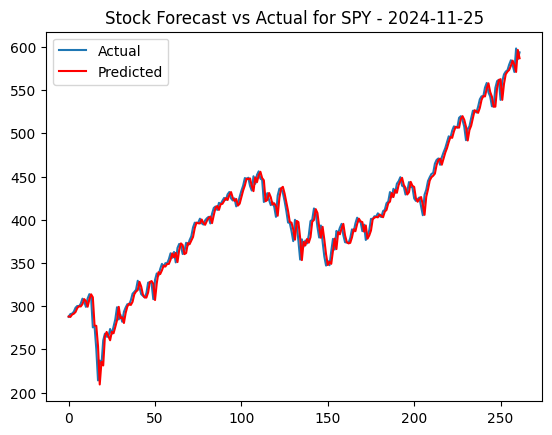

In [5]:
# Plot the results
plt.title(
    f'Stock Forecast vs Actual for {STOCK_SYMBOL} - '
    + pd.Timestamp.now().strftime("%Y-%m-%d")
)
plt.plot(test, label="Actual")
plt.plot(predictions, label="Predicted", color="red")
plt.legend()

# If FigureCanvasAgg is interactive show plot
if matplotlib.is_interactive():
    plt.show()
else:
    plt.savefig(f'output/ARIMA_{STOCK_SYMBOL}_forecast.png')